# <center>🥂 Shaken Not Stirred 🃏</center>

# Imports and setup

In [ ]:
from fluid import fluidsim
import seaborn as sns
import numpy as np
import pandas as pd

# diffusion coefficient of liquids

# Running simulations

# stirring 

Simulation initialized successfully.
Added blood source at position (0, 0) with volumeOfBlob 15.0 and radius 10.
Running simulation...
Running step 1/300
Running step 21/300
Running step 41/300
Running step 61/300
Running step 81/300
Running step 101/300
Running step 121/300
Running step 141/300
Running step 161/300
Running step 181/300
Running step 201/300
Running step 221/300
Running step 241/300
Running step 261/300
Running step 281/300


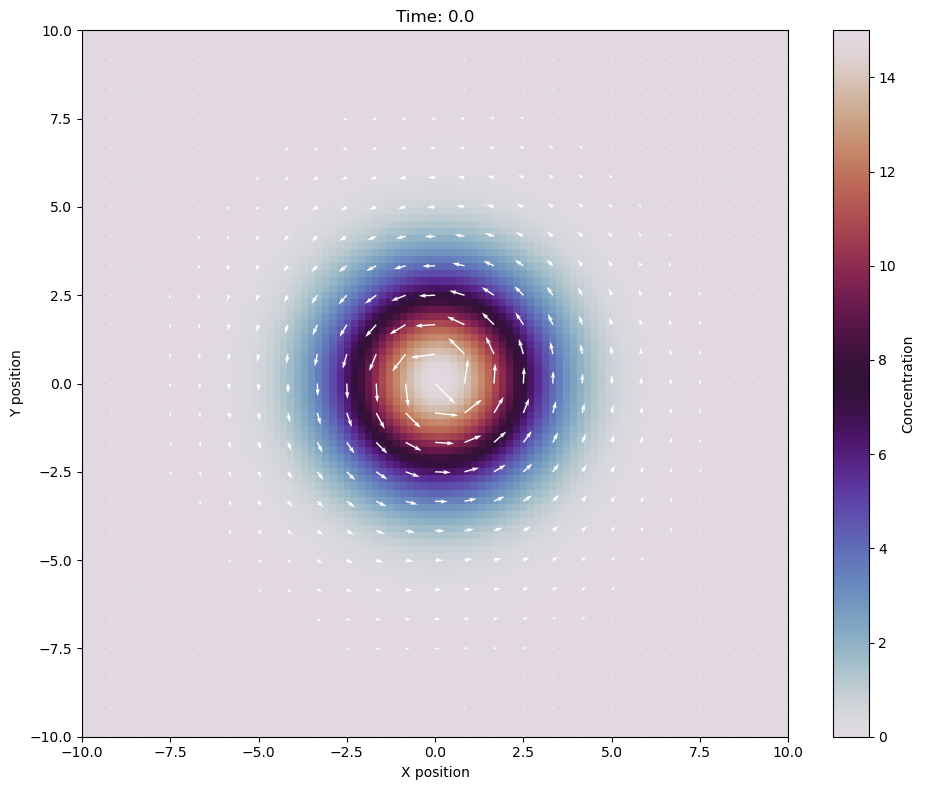

In [51]:
#change this for the right params
stirred = fluidsim(
        grid_size=100, 
        domain_size=20, 
        diffusion_coef=0.002,
        viscosity=0.02,
        dt=0.1
    )
    
stirred.source(x_pos=0, y_pos=0, volumeOfBlob=15.0, std=10)
print("Running simulation...")
conc_history, vel_history = stirred.looptheSim(steps=300)
stirred.visualisequiver(conc_history, vel_history)

# shaking

Simulation initialized successfully.
Added blood source at position (0, 0) with volumeOfBlob 15.0 and radius 10.
Running simulation...
Running step 1/300
Running step 21/300
Running step 41/300
Running step 61/300
Running step 81/300
Running step 101/300
Running step 121/300
Running step 141/300
Running step 161/300
Running step 181/300
Running step 201/300
Running step 221/300
Running step 241/300
Running step 261/300
Running step 281/300


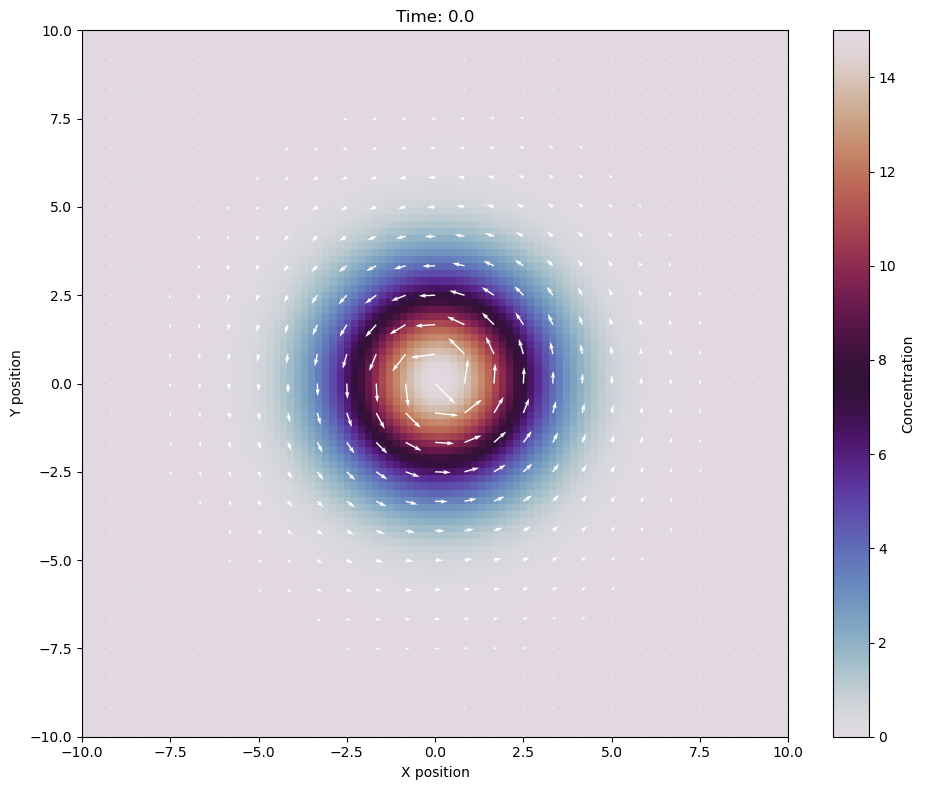

In [52]:
#change this for the right params
shaken = fluidsim(
        grid_size=100, 
        domain_size=20, 
        diffusion_coef=0.002,
        viscosity=0.02,
        dt=0.1
    )
    
shaken.source(x_pos=0, y_pos=0, volumeOfBlob=15.0, std=10)
print("Running simulation...")
conc_history, vel_history = shaken.looptheSim(steps=300)
shaken.visualisequiver(conc_history, vel_history)

# Plot distributions

In [94]:
def plot_distribution(fluidsimulation):

    grid = fluidsimulation.concentration

    # convert concentration to parts per million
    grid = grid * 1000000


    # Plot the final state using the figure method
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.imshow(grid, cmap='Blues', interpolation='nearest')
    cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
    cbar.set_label('Concentration (ppm)', rotation=270, labelpad=15)
    ax.axis('off')  # Remove x and y axis
    plt.title("Final State")
    plt.show()


    # Flatten the grid to get the distribution of values
    values = grid.flatten()

    sns.set_theme()
    dist_plot = sns.histplot(values, kde=True)
    dist_plot.set(xlabel='Concentration (ppm)')

    mean = np.mean(values)
    variance = np.var(values)

    print(f"Mean: {mean:.3g} ppm, Variance: {variance:.3g} ppm^2")
    
    return dist_plot

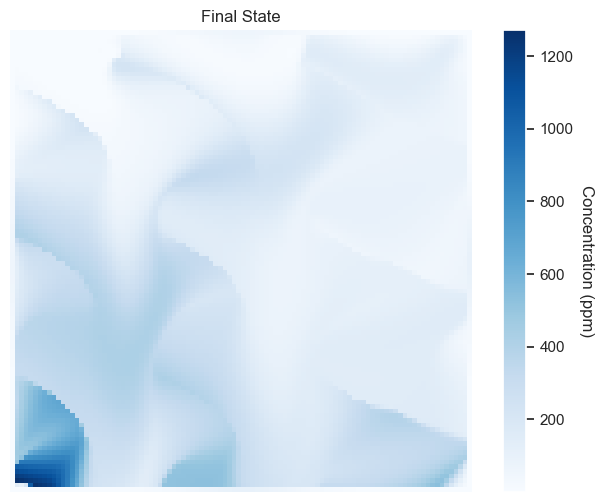

Mean: 186 ppm, Variance: 2.36e+04 ppm^2


<AxesSubplot:xlabel='Concentration (ppm)', ylabel='Count'>

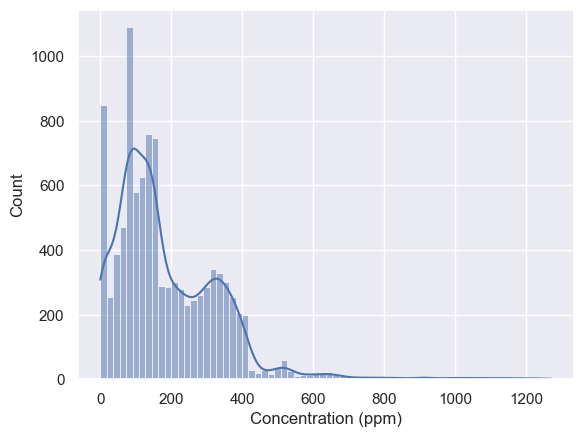

In [95]:
plot_distribution(stirred)

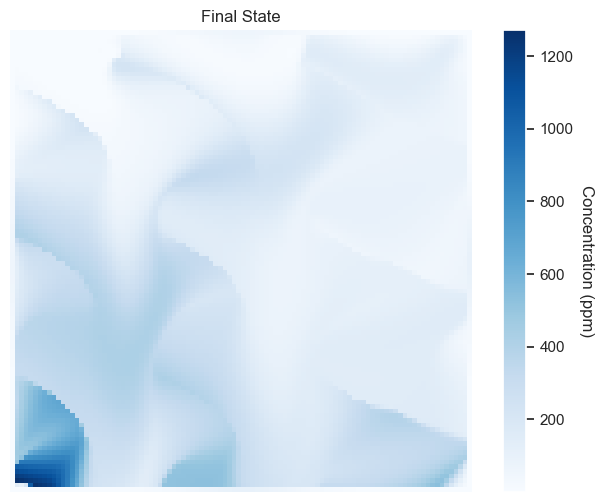

Mean: 186 ppm, Variance: 2.36e+04 ppm^2


<AxesSubplot:xlabel='Concentration (ppm)', ylabel='Count'>

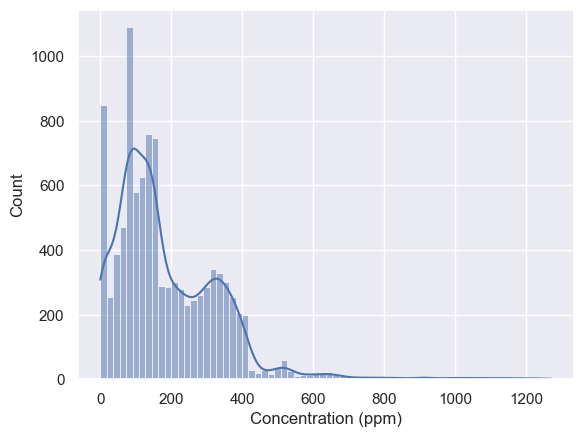

In [96]:
plot_distribution(shaken)

## double plot

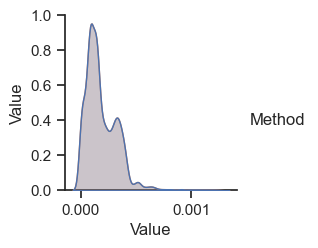

In [76]:
df_distributions = pd.DataFrame({
    'Value': np.concatenate([stirred_values, shaken_values]),
    'Method': ['Stirred'] * len(stirred_values) + ['Shaken'] * len(shaken_values)
})

sns.set_theme(style="ticks")
sns.pairplot(df_distributions, hue="Method")
